In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
def lerp(x0, y0, x1, y1, x):
    if x1 == x0:
        raise ValueError("x0 and x1 cannot be the same value")
    return y0 + (x - x0) * (y1 - y0) / (x1 - x0)

def linearInterpT(R):
    R1 = 6.7559
    R2 = 6.3308    
    R3 = 4.6151
    R4 = 4.3397
    R5 = 3.0333
    R6 = 2.8625
    R7 = 2.2810
    R8 = 2.1576


    T1 = 94
    T2 = 96
    T3 = 106
    T4 = 108
    T5 = 120
    T6 = 122
    T7 = 130
    T8 = 132

    if R2 <= R <= R1:  # between R1 and R2
        return lerp(R1, T1, R2, T2, R)
    elif R4 <= R <= R3:  # between R3 and R4
        return lerp(R3, T3, R4, T4, R)
    elif R6 <= R <= R5:  # between R5 and R6
        return lerp(R5, T5, R6, T6, R)
    elif R8 <= R <= R7:  # between R7 and R8
        return lerp(R7, T7, R8, T8, R)
    else:
        raise ValueError(f"R={R} is out of interpolation range")

vecLinInterpT = np.vectorize(linearInterpT)  


In [34]:
path = "lab-results/leslies-box.txt"
data =  np.loadtxt(path, skiprows=1)
with open(path, "r") as f:
    header = f.readline().strip()
print(header)
print(data)

PS = data[:,0] 
R = data[:,1]
T = vecLinInterpT(R)
Blank = data[:,3]
White = data[:,4]
Gray = data[:,5]
Black = data[:,6]

PS R dR VS_ ... Blank White Gray Black
[[ 5.   6.7  0.1  0.9 10.6  3.2 10.9]
 [ 7.   4.5  0.1  0.7 12.8  3.8 13.1]
 [ 8.   2.9  0.1  0.9 16.5  4.9 17.3]
 [ 9.   2.2  0.1  2.  19.1  5.7 19.5]]


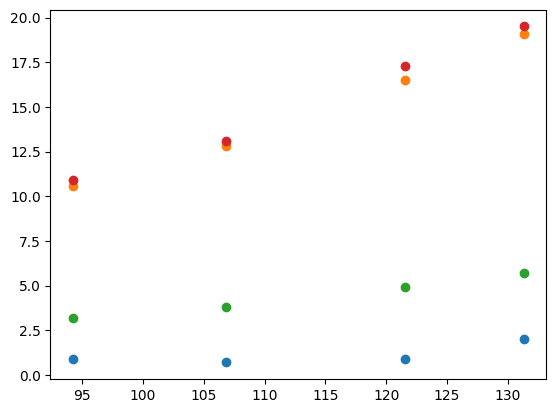

In [38]:
#sns.scatterplot(x=R, y=Blank)
for i in range(3,7):
    plt.scatter(T,data[:,i])